In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
plt.style.use('sci_style.py') 
plt.style.use('dark_background')

from robust_wm_stsp.lightning_helper import decoder
from robust_wm_stsp.lightning_networks import dDMTSNet
from robust_wm_stsp.lightning_task import dDMTSDataModule

In [8]:
dt_ann = 15
#load data generator
dDMTS = dDMTSDataModule(dt_ann = dt_ann)  
dDMTS.setup()
tester = dDMTS.test_dataloader()

In [10]:
directory = '/home/leo/ExpStableDynamics/plos_comp_bio_rebuttal/Robust_WM_STSP/scripts/_lightning_sandbox/checkpoints'
import os
num_models = len([name for name in os.listdir('.') if os.path.isfile(name)])
path, dirs, files = next(os.walk(directory))


fs = []
for i, filename in enumerate(os.listdir(directory)):
    f = os.path.join(directory, filename)
    if i >= 1:
        break

model = dDMTSNet.load_from_checkpoint(f)

Analayzing 0 out of 11
Analayzing 1 out of 11


In [2]:
with open('/home/leo/ExpStableDynamics/plos_comp_bio_rebuttal/Robust_WM_STSP/data/1.41_svm_sid_decode.pickle', 'rb') as g:
    loaded_info_dict = pickle.load(g)
loaded_info_dict.keys()

brain_info = loaded_info_dict['no_distr_mean']

def compare_to_brain(model,tester,brain_info):
    info_neur,_ = decoder(model,tester,include_distractor=False)
    corr = np.corrcoef(info_neur,brain_info)
    return corr

#info_neur,_ = decoder(model,tester,include_distractor=False)
#corr = np.corrcoef(info_neur,brain_info)

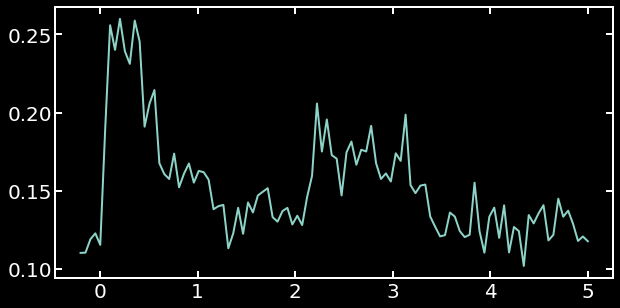

In [8]:
plt.plot(loaded_info_dict['time'],loaded_info_dict['distr_mean'])

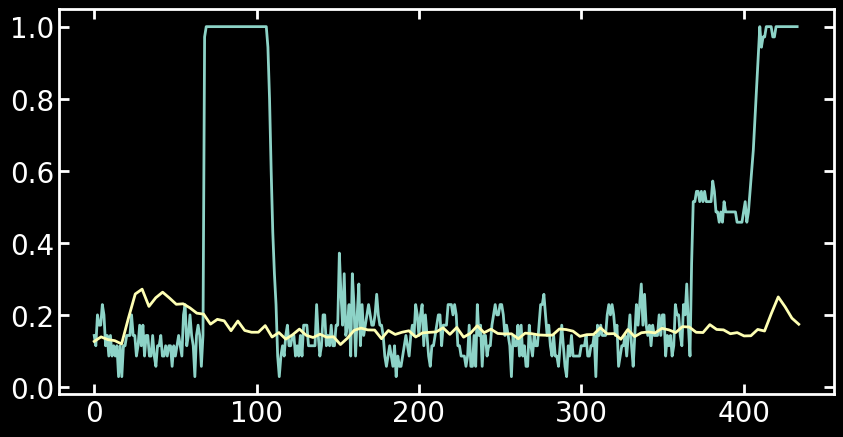

In [22]:
loaded_info_dict.keys()

plt.plot(info_neur[-1])
ts = np.linspace(0,len(info_neur[-1]),len(brain_info))
plt.plot(ts,brain_info);

In [23]:
loaded_info_dict.keys()

dict_keys(['distr_mean', 'distr_se', 'no_distr_mean', 'no_distr_se'])